In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

import pickle



In [41]:
fake_df = pd.read_csv('C:/Users/user/Desktop/projects/Fake-News-Detection/data/datasets/Fake.csv')
true_df = pd.read_csv('C:/Users/user/Desktop/projects/Fake-News-Detection/data/datasets/True.csv')
fake_df['label']=1
true_df['label']=0
df = pd.concat([fake_df, true_df], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)


In [52]:
df.head()

,title,text,subject,date,label
0,Spain to suspend Catalonia's autonomy in respo...,MADRID/BARCELONA (Reuters) - Spain s central g...,worldnews,"October 18, 2017",0
1,Hillary Issues POWERFUL Statement On What Whi...,"Earlier today, Hillary Clinton weighed in on t...",News,"July 8, 2016",1
2,Boiler Room #105 – Quantum Swamp Chess,Tune in to the Alternate Current Radio Network...,US_News,"April 14, 2017",1
3,House Speaker Ryan: Not enough support for TPP...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"February 11, 2016",0
4,Trump was wrong to retweet UK far-right group:...,LONDON (Reuters) - U.S. President Donald Trump...,worldnews,"November 29, 2017",0


In [15]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [29]:
data.describe()

,label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
with open('cleaned_news_text.pkl', 'rb') as f:
    df = pickle.load(f)

In [2]:
"""nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')  """


In [39]:
"""stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
custom_stopwords = set(['said', 'news', 'report', 'breaking', 'reuters'])  
all_stopwords = stop_words.union(custom_stopwords)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = nltk.word_tokenize(text)  
    tokens = [word for word in tokens if word not in all_stopwords and len(word) >= 3]
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  
    return ' '.join(tokens)

df['combined_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df['cleaned_text'] = df['combined_text'].apply(clean_text)
with open('cleaned_news_text.pkl', 'wb') as f:
    pickle.dump(df, f)"""

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [35]:
df['text'].iloc[5]

'MADRID (Reuters) - Spain s King Felipe VI said on Tuesday he was committed to the unity of Spain as he accused Catalan leaders, who staged a banned independence referendum on Sunday, of shattering democratic principles and of dividing Catalan society. In a televised address to the nation, the king said the  irresponsible behavior  of the Catalan leaders had undermined social harmony in Catalonia.  Today Catalan society is fractured and in conflict,  he said. He said the Spanish crown was strongly committed to the Spanish constitution and to democracy and underlined his commitment as king  to the unity and permanence of Spain.  '

In [48]:
df['text'].apply(len)

0        4363
1         985
2        3517
3        1325
4        1158
         ... 
44893    1277
44894    2939
44895       1
44896     728
44897    2426
Name: text, Length: 44898, dtype: int64

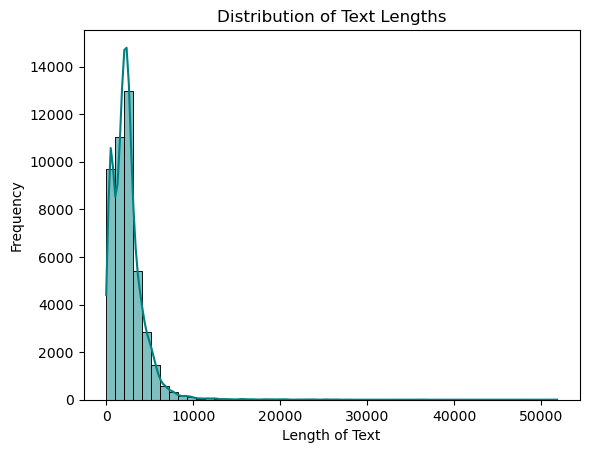

In [54]:
sns.histplot(df['text'].apply(len), bins=50, kde=True, color='teal')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

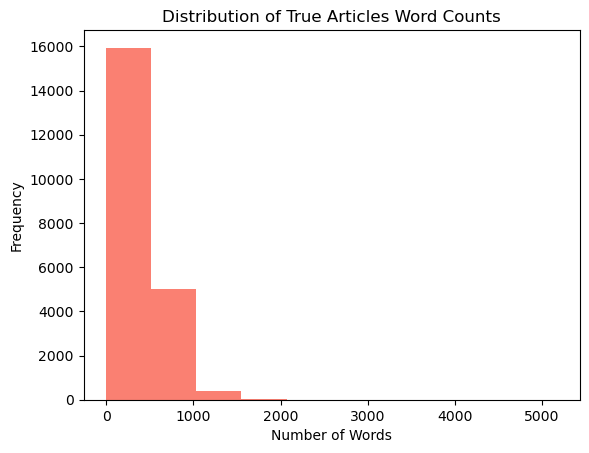

In [71]:
true_df['word_count'] = true_df['text'].apply(lambda x: len(x.split()))
plt.hist(true_df['word_count'], bins=10, color='salmon')
plt.title('Distribution of True Articles Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

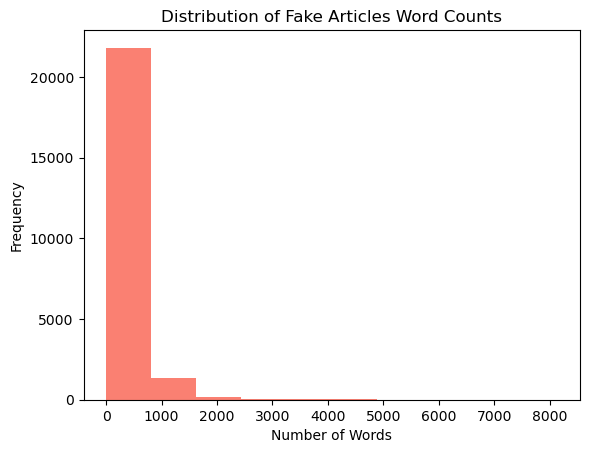

In [73]:
fake_df['word_count'] = fake_df['text'].apply(lambda x: len(x.split()))
plt.hist(fake_df['word_count'], bins=10, c0olor='salmon')
plt.title('Distribution of Fake Articles Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

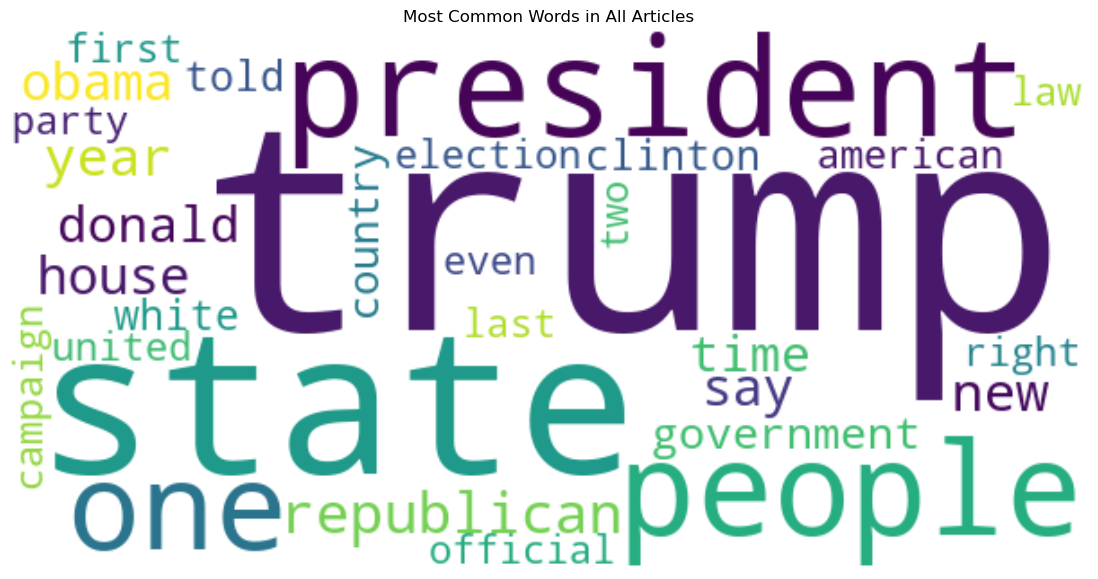

In [63]:
text = ' '.join(df['cleaned_text'].head(1000))

wordcloud = WordCloud(max_words=30,width=600, height=300, collocations=False, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in All Articles")
plt.show()


In [69]:
vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1, 2))
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["label"]
with open("tfidf_features.pkl", "wb") as f:
    pickle.dump(X, f)

with open("labels.pkl", "wb") as f:
    pickle.dump(y, f)

In [72]:
print("Shape of TF-IDF Matrix:", X.shape)


Shape of TF-IDF Matrix: (44898, 5000)


In [74]:
print("TF-IDF Matrix Density: {:.6f}".format(X.nnz / (X.shape[0] * X.shape[1])))


TF-IDF Matrix Density: 0.026880


In [76]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
avg_tfidf = X.mean(axis=0).A1  # get mean tf-idf score across docs
top_indices = np.argsort(avg_tfidf)[-20:][::-1]

print("Top 20 TF-IDF Terms Globally:")
for i in top_indices:
    print(f"{feature_names[i]}: {avg_tfidf[i]:.4f}")


Top 20 TF-IDF Terms Globally:
trump: 0.0633
state: 0.0245
president: 0.0241
would: 0.0216
republican: 0.0214
clinton: 0.0205
people: 0.0192
obama: 0.0183
video: 0.0176
house: 0.0176
one: 0.0162
new: 0.0156
year: 0.0156
white: 0.0154
hillary: 0.0154
donald: 0.0153
government: 0.0151
say: 0.0148
party: 0.0148
election: 0.0147


In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label_num"] = le.fit_transform(df["label"])

    subset = X[df["label_num"] == label]
    avg_tfidf = subset.mean(axis=0).A1
    top_indices = np.argsort(avg_tfidf)[-10:][::-1]
    
    print(f"\nTop 10 Terms for Label = {le.inverse_transform([label])[0]}:")
    for i in top_indices:
        print(f"{feature_names[i]}: {avg_tfidf[i]:.4f}")



Top 10 Terms for Label = 1:
trump: 0.0750
video: 0.0323
clinton: 0.0272
hillary: 0.0257
obama: 0.0257
people: 0.0236
president: 0.0227
one: 0.0207
like: 0.0199
republican: 0.0185

Top 10 Terms for Label = 0:
trump: 0.0504
state: 0.0324
president: 0.0257
would: 0.0257
republican: 0.0246
house: 0.0233
government: 0.0226
party: 0.0198
minister: 0.0184
united: 0.0183
